In [10]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 


from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window
import statsmodels.api as sm
file1 = 'https://raw.githubusercontent.com/anair1996/mine/main/clean.csv'
Data1 = pd.read_csv(file1,header=0)  #creates a dataframe
Data1=Data1.drop('Unnamed: 0',axis=1)
print(Data1.shape)

#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")




Num = ['LoanPayoffPeriodInMonths','RequestedAmount','InterestRate','YearsAtCurrentEmployer','YearsInCurrentResidence','Age','NumberOfDependantsIncludingSelf','CurrentOpenLoanApplications']
Cat = ['LoanReason','Co-Applicant','RentOrOwnHome','TypeOfCurrentEmployment','CheckingAccountBalance','DebtsPaid','SavingsAccountBalance']
Target = 'WasTheLoanApproved'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
(515, 17)


In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2)


train_data["LoanReason"] = le.fit_transform(train_data["LoanReason"])
train_data["Co-Applicant"] = le.fit_transform(train_data["Co-Applicant"])
train_data["RentOrOwnHome"] = le.fit_transform(train_data["RentOrOwnHome"])
train_data["TypeOfCurrentEmployment"] = le.fit_transform(train_data["TypeOfCurrentEmployment"])
train_data["CheckingAccountBalance"] = le.fit_transform(train_data["CheckingAccountBalance"])
train_data["DebtsPaid"] = le.fit_transform(train_data["DebtsPaid"])
train_data["SavingsAccountBalance"] = le.fit_transform(train_data["SavingsAccountBalance"])
X = train_data.drop( ["WasTheLoanApproved","CustomerID"],axis=1)
y = train_data["WasTheLoanApproved"]

Feature importance by XGBoost:->

LoanPayoffPeriodInMonths -> 0.07608096
LoanReason -> 0.059814256
RequestedAmount -> 0.069066025
InterestRate -> 0.05269575
Co-Applicant -> 0.04167487
YearsAtCurrentEmployer -> 0.07633762
YearsInCurrentResidence -> 0.05002044
Age -> 0.06125817
RentOrOwnHome -> 0.07897545
TypeOfCurrentEmployment -> 0.08075626
NumberOfDependantsIncludingSelf -> 0.022212053
CheckingAccountBalance -> 0.11795573
DebtsPaid -> 0.09170203
SavingsAccountBalance -> 0.07805648
CurrentOpenLoanApplications -> 0.043393817


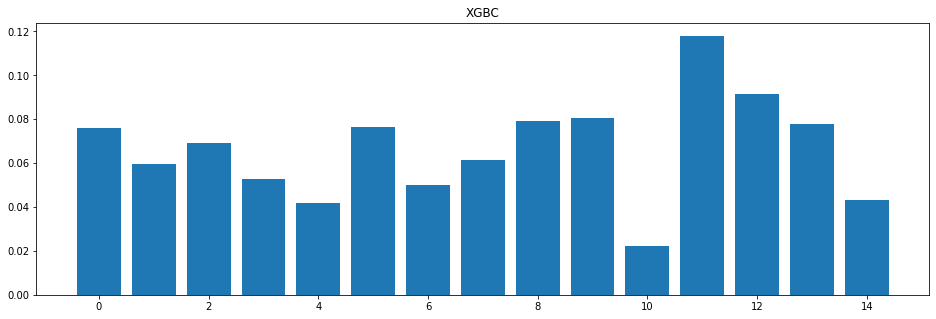

Feature importance by Random Forest:->

LoanPayoffPeriodInMonths -> 0.12193938520862938
LoanReason -> 0.0694110379628987
RequestedAmount -> 0.1688359593539885
InterestRate -> 0.048889398548344835
Co-Applicant -> 0.029193424991173385
YearsAtCurrentEmployer -> 0.07975025798664091
YearsInCurrentResidence -> 0.05018802976879878
Age -> 0.13137954252242373
RentOrOwnHome -> 0.03216756433253796
TypeOfCurrentEmployment -> 0.05254450989184344
NumberOfDependantsIncludingSelf -> 0.018227496244443794
CheckingAccountBalance -> 0.07663407126154326
DebtsPaid -> 0.032729345526381015
SavingsAccountBalance -> 0.060884213089767464
CurrentOpenLoanApplications -> 0.027225763310584856


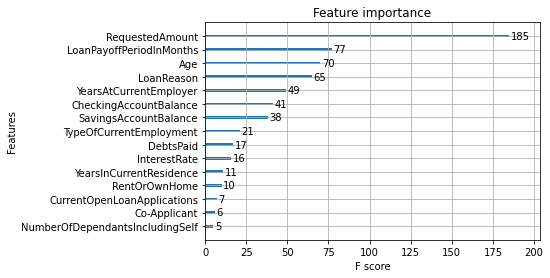

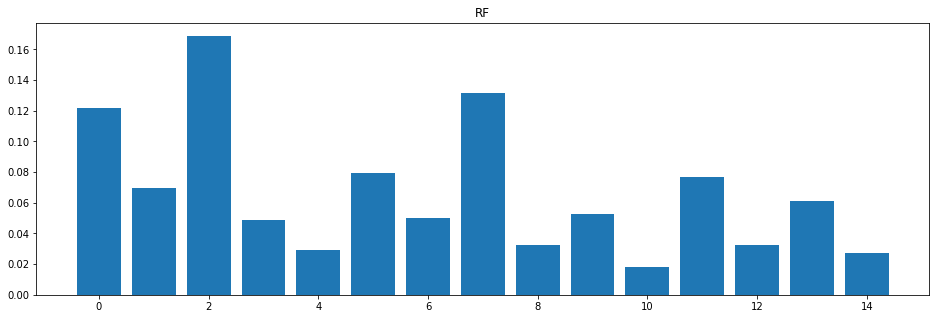

Feature importance by Decision Tree:->

LoanPayoffPeriodInMonths -> 0.09398260960985165
LoanReason -> 0.07730136336000049
RequestedAmount -> 0.21711451248011976
InterestRate -> 0.020234857577364936
Co-Applicant -> 0.0032450874211657744
YearsAtCurrentEmployer -> 0.05649452733870609
YearsInCurrentResidence -> 0.05854188292608511
Age -> 0.1873608882726453
RentOrOwnHome -> 0.03061743638993215
TypeOfCurrentEmployment -> 0.0422710848856859
NumberOfDependantsIncludingSelf -> 0.007336806754445565
CheckingAccountBalance -> 0.10591828909276453
DebtsPaid -> 0.0
SavingsAccountBalance -> 0.08958793014638684
CurrentOpenLoanApplications -> 0.00999272374484599


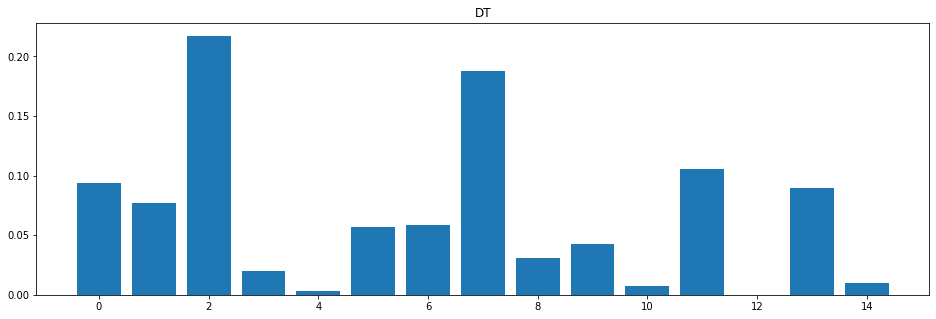

Feature importance by Suppoprt Vector Machine:->

LoanPayoffPeriodInMonths -> -0.10026740649767873
LoanReason -> -0.03365502944399257
RequestedAmount -> -0.0006198743139975704
InterestRate -> -2.2331055825543515
Co-Applicant -> 1.5135811983019405
YearsAtCurrentEmployer -> 0.39613329043355705
YearsInCurrentResidence -> 0.3583910144443152
Age -> 0.1134764375097177
RentOrOwnHome -> 1.5000723321835272
TypeOfCurrentEmployment -> 0.42191259726098274
NumberOfDependantsIncludingSelf -> 0.8969460629782917
CheckingAccountBalance -> 1.5648895251069508
DebtsPaid -> -3.9530809518450347
SavingsAccountBalance -> -0.44055208526830825
CurrentOpenLoanApplications -> -0.060757406548898274


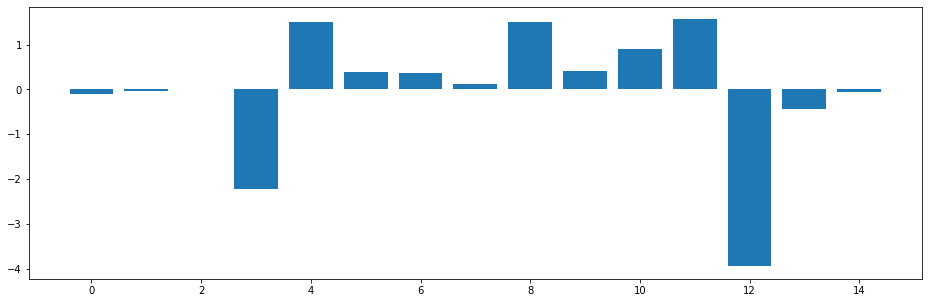

Feature importance by Logistic Regression:->

LoanPayoffPeriodInMonths -> -0.022343322087341577
LoanReason -> -0.06729391527381666
RequestedAmount -> -0.0001353203099592295
InterestRate -> -0.0316133971204516
Co-Applicant -> 0.12765067242528938
YearsAtCurrentEmployer -> 0.08676309210422199
YearsInCurrentResidence -> 0.02514877272164821
Age -> 0.02036648635984369
RentOrOwnHome -> 0.13609206353614045
TypeOfCurrentEmployment -> 0.1799706933762613
NumberOfDependantsIncludingSelf -> -0.0035188799671631837
CheckingAccountBalance -> 0.3077273735797434
DebtsPaid -> -0.21186932722090138
SavingsAccountBalance -> -0.23784761410718022
CurrentOpenLoanApplications -> 0.08548627911654118


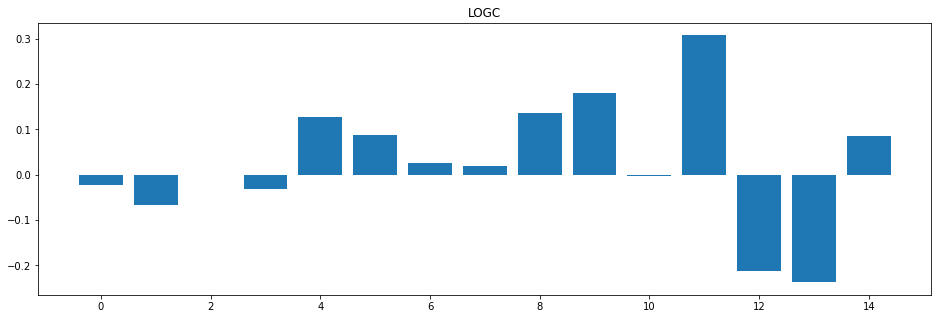

In [12]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

 Important Features:

[CheckingAccountBalance ,LoanPayoffPeriodInMonths ,RequestedAmount ,SavingsAccountBalance,CurrentOpenLoanApplication,Age,YearsAtCurrentEmployer,LoanReason ]

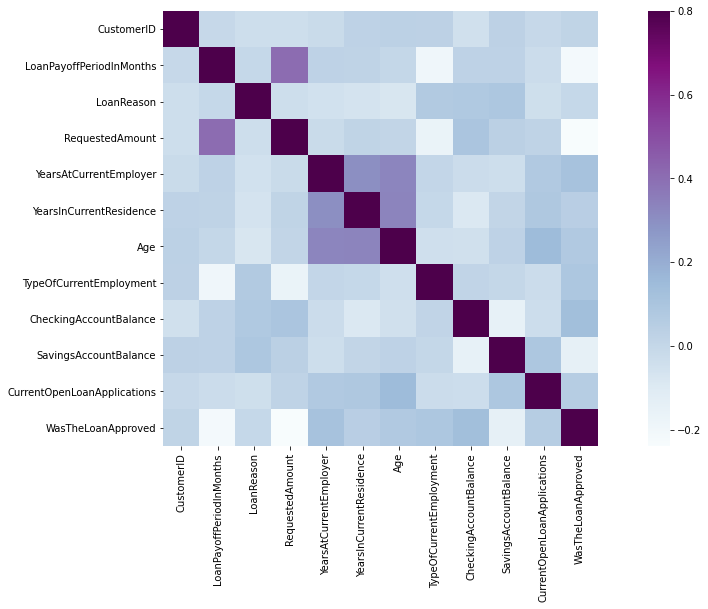

In [14]:
#Heat map of dataset with relative importance
matrix = data.drop(["Co-Applicant","InterestRate","NumberOfDependantsIncludingSelf","RentOrOwnHome","DebtsPaid"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

LoanPayOffPeriodInMonths : RequestedAmount
RequestedAmount, Age, YearsAtCurrentEmployer, YearsInCurrentResidence,

In [15]:
#To keep original data as it is to use the same for later.
new_data = data.copy(deep=False)


#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.WasTheLoanApproved==1]
df_minority = new_data[new_data.WasTheLoanApproved==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.WasTheLoanApproved.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.WasTheLoanApproved.value_counts())==1
df_minority = new_data[new_data.WasTheLoanApproved==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.WasTheLoanApproved.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.WasTheLoanApproved.value_counts())

Downsampled data:->
 1    192
0    167
Name: WasTheLoanApproved, dtype: int64
Upsampled data:->
 0    422
1    348
Name: WasTheLoanApproved, dtype: int64
Downsampled data:->
 1    192
0    167
Name: WasTheLoanApproved, dtype: int64
Upsampled data:->
 0    422
1    348
Name: WasTheLoanApproved, dtype: int64


In [16]:
#Experiment 1: Only Scaled data with all variables


X = new_data.drop(["WasTheLoanApproved","CustomerID"],axis=1)
y = new_data["WasTheLoanApproved"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

Counter:  Counter({1: 348, 0: 167})
After Standardization
Mean  -7.209738467341259e-18 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.38      0.52      0.44        31
           1       0.83      0.73      0.78        98

    accuracy                           0.68       129
   macro avg       0.60      0.63      0.61       129
weighted avg       0.72      0.68      0.70       129

Voting Ensemble:> 0.6821705426356589
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        32
           1       0.82      0.73      0.77        97

    accuracy                           0.67       129
   macro avg       0.60      0.62      0.60       129
weighted avg       0.71      0.67      0.69       129

XGBoost:> 0.6744186046511628
              precision    recall  f1-score   support

           0       0.36      0.56      0.43        27
           1       0.86      0.74      0.79       102

   

Increase Accuracy

In [18]:
#Experiment 2: Sclaed + Up Sampled Data


X = df_upsampled.drop(["WasTheLoanApproved","CustomerID"],axis=1)
y = df_upsampled.WasTheLoanApproved
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

770 770
After Standardization
Mean  -1.9651781325542922e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.77      0.81      0.79        84

    accuracy                           0.81       193
   macro avg       0.81      0.81      0.81       193
weighted avg       0.82      0.81      0.81       193

Voting Ensemble:> 0.8134715025906736
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       104
           1       0.62      0.62      0.62        89

    accuracy                           0.65       193
   macro avg       0.65      0.65      0.65       193
weighted avg       0.65      0.65      0.65       193

SVM:> 0.6528497409326425
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        95
           1       0.76      0.68      0.72        98

    accuracy                      

The best base line accuracy was for XgBoost which had the highest accuracy of close to 69%
After up-sampling and scaling, the ensemble voting model of "XGB","RF","DT","ADB","GB” showed an accuracy of 80%

